In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
#file_name = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_091104/netcdf/channelStorage_dailyTot_output.nc' 

file_name_1 = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Images_etc/discharge_dailyTot_output.nc'
#file_name_2 ='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_CMIP_1010/AralSeaBasin/CMIP6/historical/PCRGlobWB/preproc/diagnostic/tas/CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_tas_gn_2010-2010.nc'

In [3]:
ds_1 = xr.open_dataset(file_name_1)
print(ds_1)

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 1539, lat: 360, lon: 720)
Coordinates:
  * time       (time) datetime64[ns] 12kB 1960-01-01 1960-01-02 ... 1964-03-18
  * lat        (lat) float32 1kB 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 3kB -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables:
    discharge  (time, lat, lon) float32 2GB ...
Attributes:
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output, with human factors (non-natural)
    description:  PCR-GLOBWB run with human factors (non-natural) at 30 arcmi...


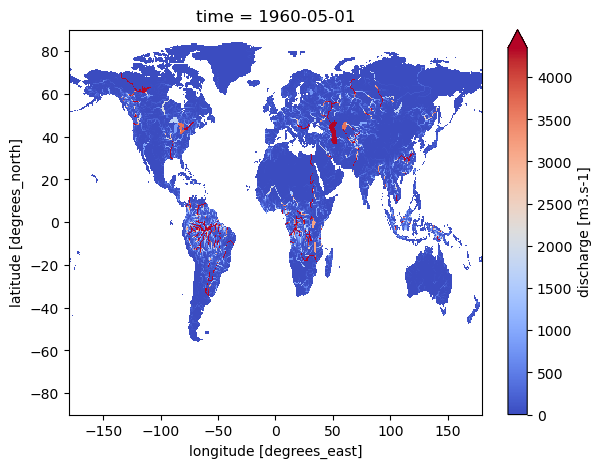

In [4]:
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=121)


#da_1 = ds_1[0].isel(time =-1)


da_1.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

Text(0.5, 0, 'Date')

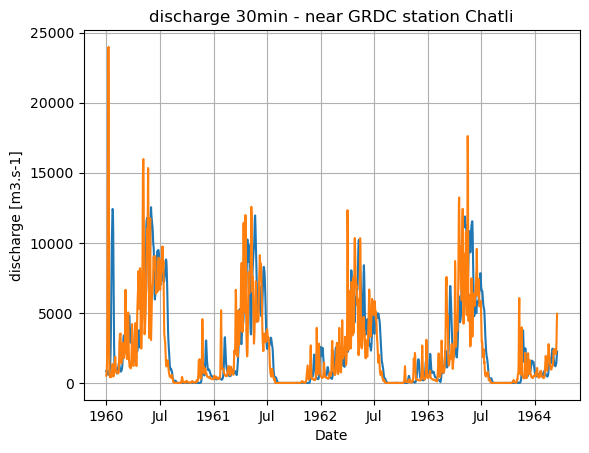

In [5]:
da_slice = ds_1[first_var].sel(lat=42.35144950637272,lon=59.6170672781565, method="nearest")
da_slice_kerki = ds_1[first_var].sel(lat=37.84142225056401,lon=65.23396486873717, method="nearest")

#37.84142225056401, 65.23396486873717 Kerki
da_slice.plot()
da_slice_kerki.plot()
plt.title('discharge 30min - near GRDC station Chatli')
plt.grid()
plt.xlabel('Date')

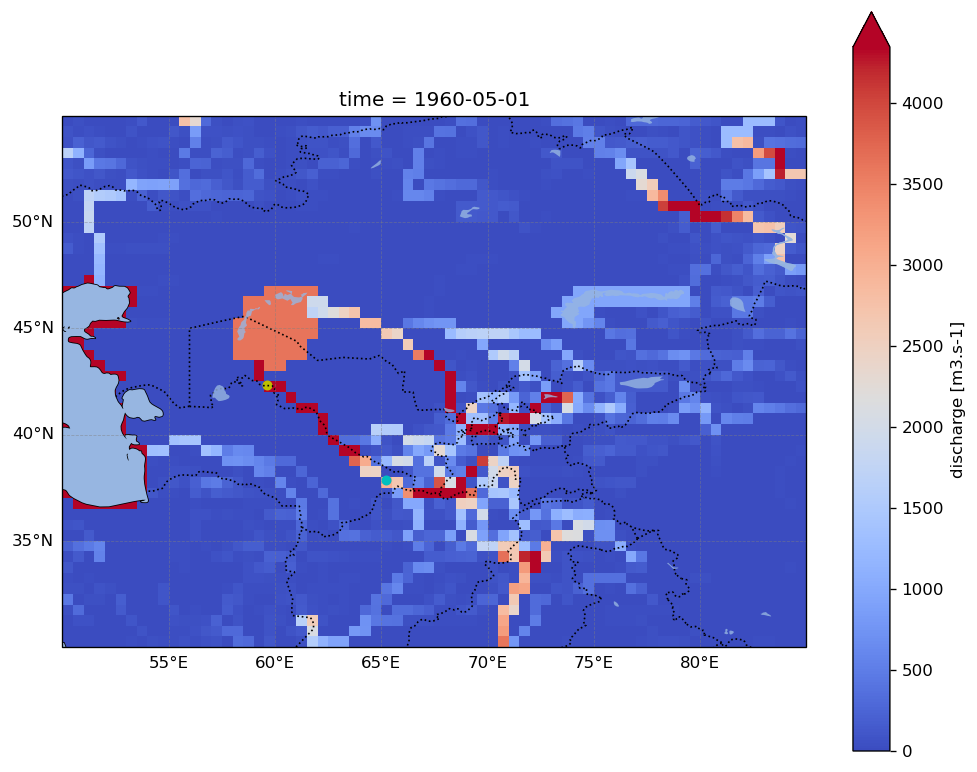

In [6]:


# Figure
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.set_extent([50, 85, 30, 55], crs=ccrs.PlateCarree())

da_1.plot(ax=ax, cmap="coolwarm", robust=True)
# Add features
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, alpha=0.8)
ax.add_feature(cfeature.COASTLINE)

ax.scatter(59.6170672781565, 42.35144950637272, s=25, c="y", label = "Chatli")
ax.scatter(65.23396486873717, 37.84142225056401, s=25, c="c", label = "Kerki")

#38.27886233967275, 64.47358098132075
#44.10221360453554, 66.50162231337735


# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Legend